# Library

In [8]:
# plot learning curve of an xgboost model
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import scoring, model
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Create dummy data

In [5]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [6]:
models,names_model,probs_model,probs_bool_model,pred_model,time_1,time_2 = model.modeling(
    X_train, X_test, y_train, y_test,['xgb'],detail=False)

we have done with these models:
Xgboost


In [9]:
X_test = pd.DataFrame(X_test,columns=cancer.feature_names)
X_train = pd.DataFrame(X_train,columns=cancer.feature_names)

In [13]:
X_test["mean radius"]

0      12.75
1      17.99
2      14.96
3      12.88
4      14.60
       ...  
138    14.74
139    10.60
140    11.70
141    14.50
142    12.18
Name: mean radius, Length: 143, dtype: float64

# print score for binary label

comfusion matrix = 
[[48  5]
 [ 2 88]]


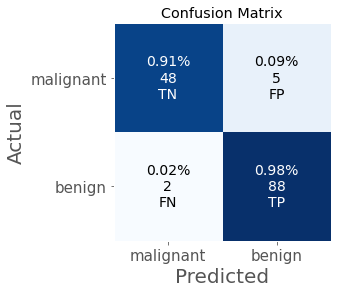


accuracy_score =  0.951
balanced_accuracy_score =  0.9417

precision score =  0.9462
average precision score =  0.9392
recall score =  0.9778
Brier score loss (the smaller the better) =  0.0303

F1 score =  0.9617
F2 score =  0.9713
F3 score =  0.9745
F_beta score (0.5) =  0.9524
Matthews Correlation Coefficient score =  0.8948

AUC of Precision-Recall Curve on Testing =  0.9961
Best Threshold for Precision-Recall Curve = 0.241400
F-Score = 0.973
AUC of ROC =  0.9935

Best Threshold for ROC = 0.835900
G-Mean = 0.959
Best Threshold with Youden’s J statistic = 0.835900

Cohens kappa =  0.8938
Gini =  0.9922

Expected Approval Rate =  0.6503
Expected Default Rate =  0.0538

classification_report
              precision    recall  f1-score   support

           0       0.96      0.91      0.93        53
           1       0.95      0.98      0.96        90

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95  

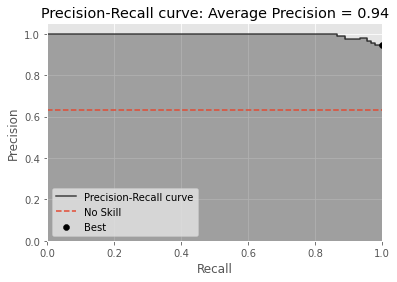

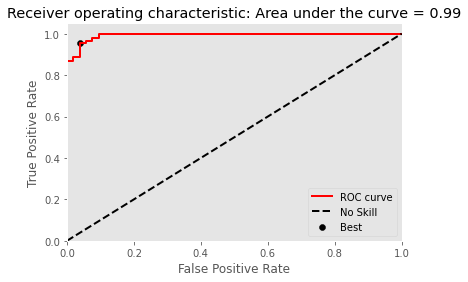


time span=  0:00:00.113001


In [95]:
scoring.print_score(y_test,pred_model[0],y_probs=probs_model[0],
                    types='classification',labels=['malignant', 'benign'],
                    time1=time_1[0],time2=time_2[0],
                    X_train=None, y_train=None,X_test=None)

# prob to label with threshold

In [27]:
scoring.prob_to_label_thres(probs_model[0], 0.8359)

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

# Find the best treshold

In [62]:
scoring.compare_threshold(models[0],X_test,y_test,[1-0.8359,0.3,0.5,0.8359,0.9])

,0.1641,0.3000,0.5000,0.8359,0.9000
accuracy,0.9580,0.9580,0.9510,0.9580,0.9371
balanced_accuracy,0.9434,0.9473,0.9417,0.9589,0.9422
recall,1.0000,0.9889,0.9778,0.9556,0.9222
precision,0.9375,0.9468,0.9462,0.9773,0.9765
avg_precision,0.9375,0.9433,0.9392,0.9618,0.9495
F1,0.9677,0.9674,0.9617,0.9663,0.9486
F2,0.9494,0.9549,0.9524,0.9729,0.9651
F3,0.9434,0.9509,0.9493,0.9751,0.9708
F_beta_score,0.9494,0.9549,0.9524,0.9729,0.9651
matthews_score,0.9118,0.9103,0.8948,0.9112,0.8700


# Reliability diagram

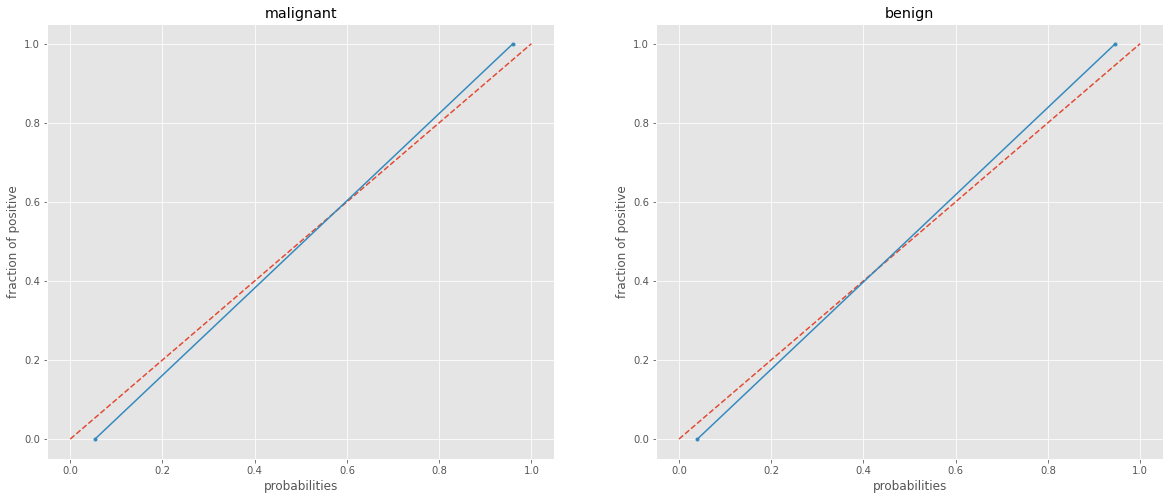

ECE SCORE FOR malignant = 0.048951
ECE SCORE FOR benign = 0.048951


({0: array([0.05376344, 0.96      ]), 1: array([0.04      , 0.94623656])},
 {0: array([0., 1.]), 1: array([0., 1.])})

In [34]:
scoring.reliability_diagram_simple(y_test,pred_model[0],['malignant', 'benign'],types='non_dl')

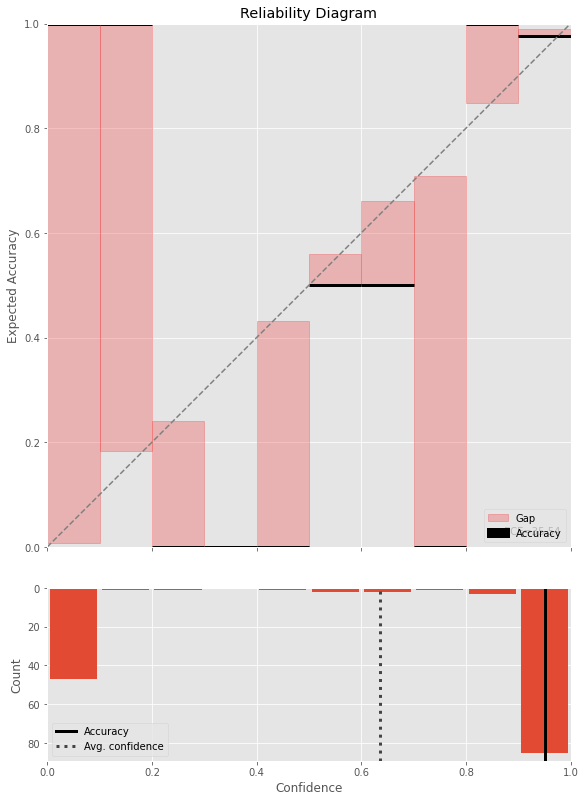

In [36]:
scoring.reliability_diagram(y_test,pred_model[0],probs_model[0])

# Generalizing confusion matrix

In [8]:
cf_matrix = np.asarray([
                    [5,1,0,0,0,0],
                    [0,5,0,0,0,0],
                    [0,1,5,1,0,0],
                    [0,0,0,5,0,0],
                    [0,0,0,0,5,0],
                    [0,0,1,0,0,5]])

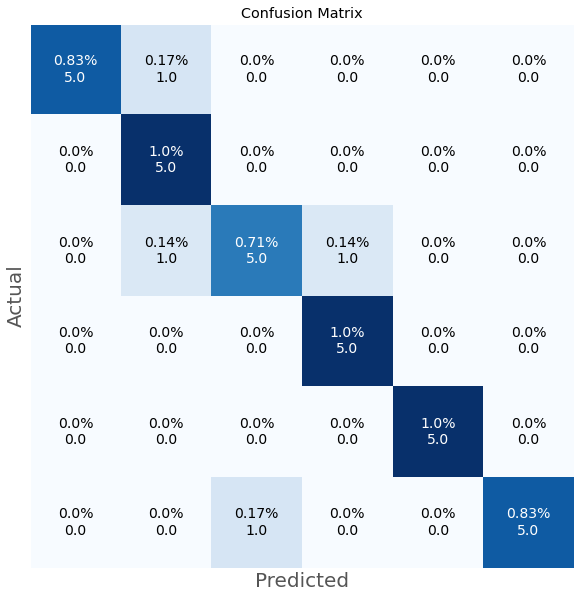

In [14]:
gen_cfmatrix = scoring.generalize_cfmatrix(cf_matrix, 6,labels=None)

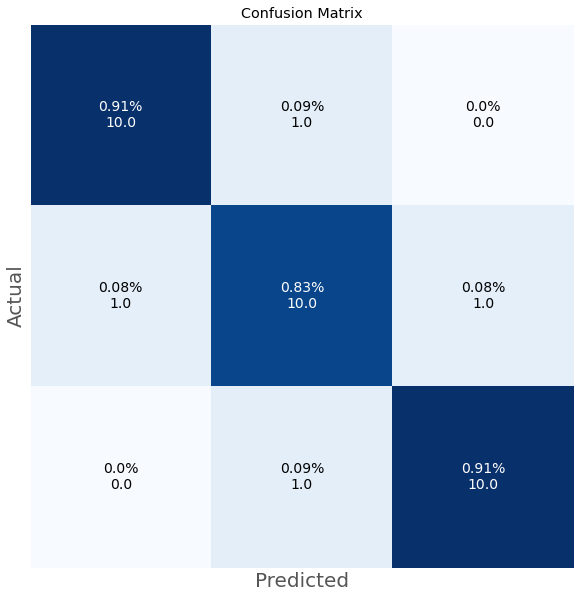

In [15]:
gen_cfmatrix = scoring.generalize_cfmatrix(cf_matrix, 3,labels=None)

# Decile Plots and KS statistic

In [100]:
decile_train,decile_test = scoring.deciling_plot(models[0],X_train,y_train,X_test,y_test)

In [101]:
decile_train

,TOTAL,TARGET,NONTARGET,PCT_TAR,CUM_TAR,CUM_NONTAR,DIST_TAR,DIST_NONTAR,SPREAD
DECILE,,,,,,,,,
0.0,0,0,0,0.000000,0,0,0.000000,0.000000,0.000000
1.0,43,43,0,100.000000,43,0,16.104869,0.000000,16.104869
2.0,42,42,0,100.000000,85,0,31.835206,0.000000,31.835206
3.0,43,43,0,100.000000,128,0,47.940075,0.000000,47.940075
4.0,42,42,0,100.000000,170,0,63.670412,0.000000,63.670412
5.0,43,43,0,100.000000,213,0,79.775281,0.000000,79.775281
6.0,42,42,0,100.000000,255,0,95.505618,0.000000,95.505618
7.0,43,12,31,27.906977,267,31,100.000000,19.496855,80.503145
8.0,42,0,42,0.000000,267,73,100.000000,45.911950,54.088050


In [102]:
decile_test

,TOTAL,TARGET,NONTARGET,PCT_TAR,CUM_TAR,CUM_NONTAR,DIST_TAR,DIST_NONTAR,SPREAD
DECILE,,,,,,,,,
0.0,0,0,0,0.000000,0,0,0.000000,0.000000,0.000000
1.0,15,15,0,100.000000,15,0,16.666667,0.000000,16.666667
2.0,14,14,0,100.000000,29,0,32.222222,0.000000,32.222222
3.0,14,14,0,100.000000,43,0,47.777778,0.000000,47.777778
4.0,14,14,0,100.000000,57,0,63.333333,0.000000,63.333333
5.0,14,14,0,100.000000,71,0,78.888889,0.000000,78.888889
6.0,15,13,2,86.666667,84,2,93.333333,3.773585,89.559748
7.0,14,6,8,42.857143,90,10,100.000000,18.867925,81.132075
8.0,14,0,14,0.000000,90,24,100.000000,45.283019,54.716981


# Lift chart, Actual vs predicted and Gains chart

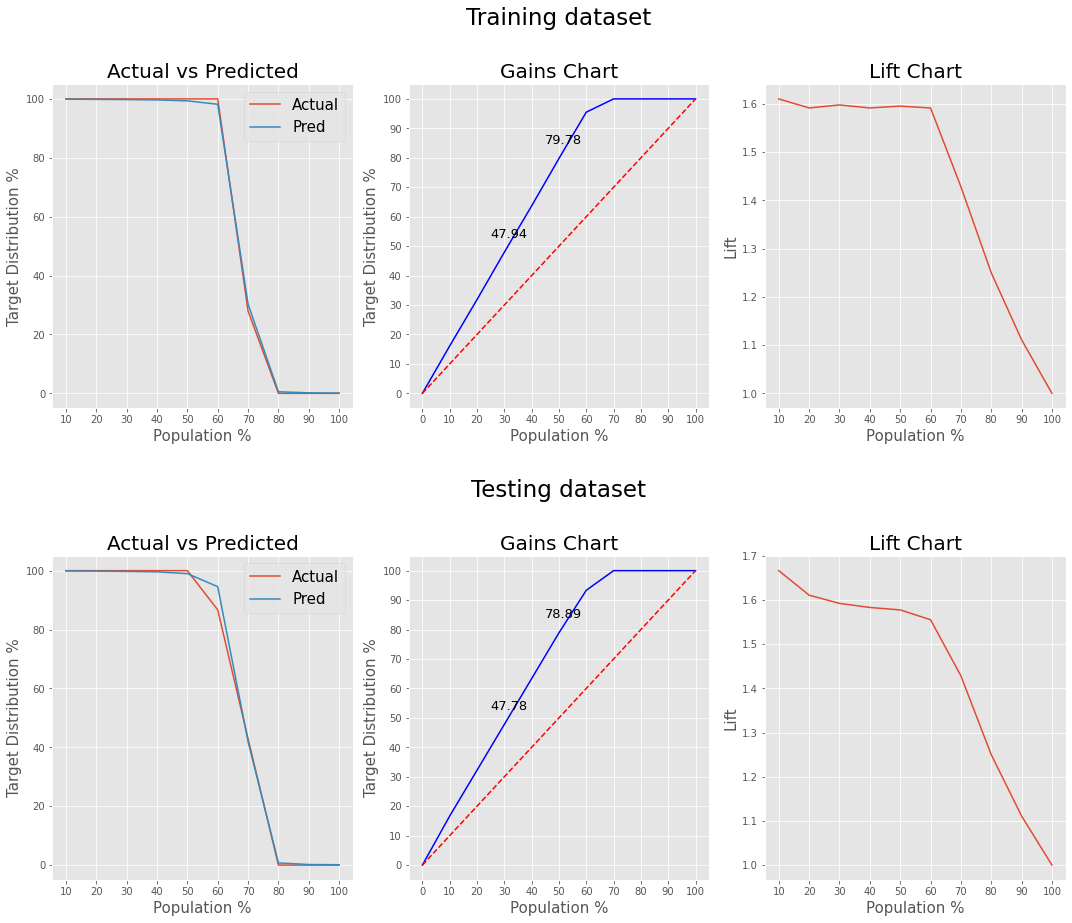

In [125]:
scoring.gains_plot(models[0],X_train,y_train,X_test,y_test)